# Složená tělesa I

## Zadání

U těles podle obrázku proveďte napjatostní analýzu.

<img src="stena_valcova_skorepina_b.png" alt="stěna a válcová skořepina" title="stěna a válcová skořepina" width="300"/>

## Řešení

Nutné knihovny Pythonu a nastavení matematické sazby.

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
sp.init_printing()

Uvolnění s využitím symetrie.

<img src="stena_valcova_skorepina_a.png" alt="stěna a válcová skořepina" title="stěna a válcová skořepina" width="500"/>

Použité konstanty a symboly.

In [2]:
Nz=sp.symbols('N_z')
p,F=sp.symbols('p F')
rI2,hI=sp.symbols('r^I_2 h^I')
R,hII=sp.symbols('R h_II')
E,B,mu,beta=sp.symbols('E B mu beta')
AI,BI=sp.symbols('A^I B^I')
C1,C2=sp.symbols('C1 C2')
z,r=sp.symbols('z r')

### Stěna:

Základní vztahy pro normalová napětí $\sigma_r$, tangenciální napětí $\sigma_t$ a radiální posuvy $u$ jsou následující

\begin{equation}
  \begin{split}
    \sigma_r^I &= A^I-B^I\frac{1}{r^2}, \\
    \sigma_t^I &= A^I+B^I\frac{1}{r^2}, \\
    u^I &=\frac{(1+\mu)(1-2\mu)}{E}A^Ir+\frac{1+\mu}{E}B^I\frac{1}{r}.
  \end{split}
\end{equation}

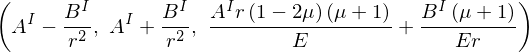

In [3]:
sr=AI-BI/r**2
st=AI+BI/r**2
uI=(1+mu)*(1-2*mu)/E*AI*r+(1+mu)/E/r*BI
sr,st,uI

Okrajové podmínky stěny jsou tyto

\begin{equation}
  \begin{split}
    \sigma_r^I &= -\frac{\mathcal{2F}}{h^I}\quad\mathrm{pro}\,r=r_1=R, \\
    \sigma_r^I &= 0\quad\mathrm{pro}\,r=r_2.
  \end{split}
\end{equation}

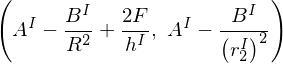

In [4]:
beqnI1=sr.subs(r,R)+2*F/hI
beqnI2=sr.subs(r,rI2)
beqnI1,beqnI2

Z nich plynou hondoty konstant $A^I$ a $B^I$.

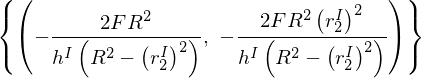

In [5]:
solbI=sp.linsolve([beqnI1,beqnI2],[AI,BI])
solbI

### Skořepina:

Základní vztahy pro posuvy $u$, natočení $\vartheta$, momenty $\mathcal{M}_z$, $\mathcal{M}_t$, posouvající síly $\mathcal{T}$ a normálové síly $\mathcal{N}_t$ u skořepiny jsou následující

\begin{equation}
  \begin{split}
    u^{II} &= \mathrm{e}^{-\beta z}\big(C_1\sin\beta z+C_2\cos\beta z\big)+u_p, \\
    \vartheta &= \frac{\partial u^II}{\partial z}, \\
    \mathcal{M}_z &= -B\frac{\partial^2 u^{II}}{\partial z^2}, \\
    \mathcal{M}_t &= \mu\mathcal{M}_z, \\
    \mathcal{T} &= -B\frac{\partial^3 u^{II}}{\partial z^3}, \\
    \mathcal{N}_t &= R\Bigg[p-B\frac{\partial^4 u^{II}}{\partial z^4}\Bigg],
  \end{split}
\end{equation}

kde $u_p$ je partikulární řešení

\begin{equation}
  u_p=\frac{R^2p}{Eh^{II}}.
\end{equation}

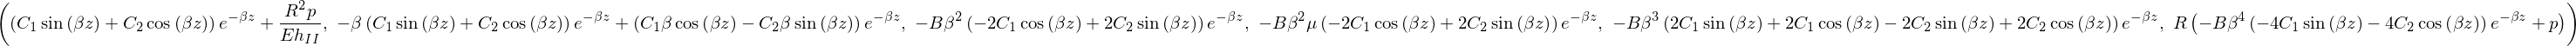

In [6]:
up=R**2/E/hII*p
uII=sp.exp(-beta*z)*(C1*sp.sin(beta*z)+C2*sp.cos(beta*z))+up
t=uII.diff(z)
Mz=-B*uII.diff(z,2)
Mt=mu*Mz
T=-B*uII.diff(z,3)
Nt=R*(p-B*uII.diff(z,4))
uII,t,Mz,Mt,T,Nt

Předepsáné okrajové podmínky pro skořepinu jsou

\begin{equation}
  \begin{split}
    \vartheta &= 0\quad\mathrm{pro}\,z=0, \\
    \mathcal{T} &= \mathcal{F}\quad\mathrm{pro}\,z=0.
  \end{split}
\end{equation}

In [7]:
benqII1=t.subs(z,0)
benqII2=T.subs(z,0)-F
benqII1,benqII2

Jejich řešením jsou konstanty $C_1$ a $C_2$.

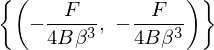

In [8]:
solbII=sp.linsolve([benqII1,benqII2],[C1,C2])
solbII

### Deformační podmínka pro vyjádření $\mathcal{F}$

\begin{equation}
  u^I(r)+u^{II}(z)=0\quad\mathrm{pro}\,r=r_1=R\wedge z=0.
\end{equation}

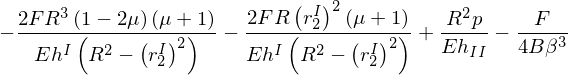

In [9]:
eqnd=uI.subs({AI:solbI.args[0][0],BI:solbI.args[0][1],r:R})+ \
     uII.subs({C1:solbII.args[0][0],C2:solbII.args[0][1],z:0})
eqnd

Řešení deformační podmínky pro sílu $\mathcal{F}$.

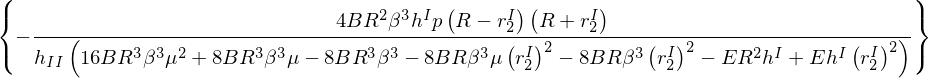

In [10]:
sold=sp.solveset(eqnd,F)
sold

### Numerický příklad:

Zadané parametry:

In [11]:
rI2_,hI_=200,10
R_,hII_=100.,2.
E_,mu_=2.1e5,0.3
p_=30.

Dosazení zadaných parametrů do $B$,$\beta$, $\mathcal{F}$, $A^I$, $B^I$, $C_1$ a $C_2$.

In [12]:
B_=E_*hII_**3/12./(1.-mu_)
beta_=(3.*(1.-mu_**2)/R_**2/hII_**2)**(1./4.)
F_=float(sold.args[0].subs({R:R_,rI2:rI2_,hI:hI_,hII:hII_,E:E_,mu:mu_,p:p_, \
         B:B_,beta:beta_}))
AI_=float(solbI.args[0][0].subs({R:R_,rI2:rI2_,hI:hI_,F:F_}))
BI_=float(solbI.args[0][1].subs({R:R_,rI2:rI2_,hI:hI_,F:F_}))
C1_=float(solbII.args[0][0].subs({F:F_,B:B_,beta:beta_}))
C2_=float(solbII.args[0][1].subs({F:F_,B:B_,beta:beta_}))
B_,beta_,F_,AI_,BI_,C1_,C2_

**Stěna:**

Převedení $u^I$, $\sigma^I_r$ a $\sigma^I_t$ na funkce.

In [13]:
uI_=sp.lambdify((r,E,mu,AI,BI),uI)
sr_=sp.lambdify((r,AI,BI),sr)
st_=sp.lambdify((r,AI,BI),st)

Vykreslení $u^I$, $\sigma^I_r$ a $\sigma^I_t$.

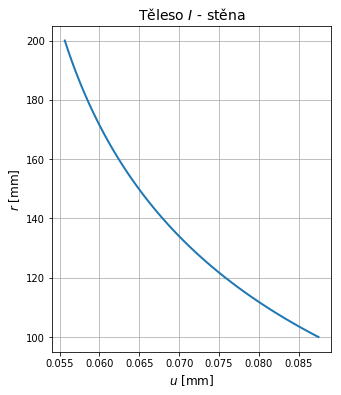

In [14]:
r_=np.linspace(R_,rI2_,100)
uIplot=[uI_(ii,E_,mu_,AI_,BI_) for ii in r_]
srplot=[sr_(ii,AI_,BI_) for ii in r_]
stplot=[st_(ii,AI_,BI_) for ii in r_]

fig,ax=plt.subplots(figsize=(5,6))
plt.title('Těleso $I$ - stěna').set_fontsize(14)
ax.set_ylabel(r'$r$ [mm]').set_fontsize(12)
ax.set_xlabel(r'$u$ [mm]').set_fontsize(12)
ax.plot(uIplot,r_,lw=2)
ax.grid(True)
plt.show()

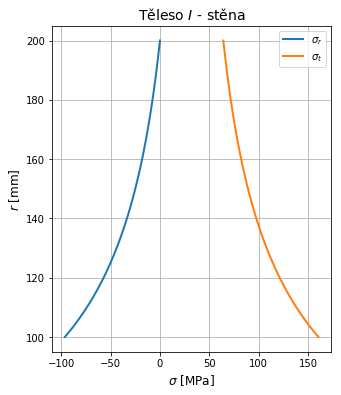

In [15]:
fig,ax=plt.subplots(figsize=(5,6))
plt.title('Těleso $I$ - stěna').set_fontsize(14)
ax.set_xlabel(r'$\sigma$ [MPa]').set_fontsize(12)
ax.set_ylabel(r'$r$'+' [mm]').set_fontsize(12)
ax.plot(srplot,r_,lw=2,label=r'$\sigma_r$')
ax.plot(stplot,r_,lw=2,label=r'$\sigma_t$')
ax.legend(loc='best')
ax.grid(True)
plt.show()

**Skořepina:**

Převedení $u^{II}$, $\sigma^{II}_r$ a $\sigma^{II}_t$ na funkce.

In [16]:
uII_=sp.lambdify((z,R,p,E,hII,beta,C1,C2),uII)
Mz_=sp.lambdify((z,B,beta,C1,C2),Mz)
Mt_=sp.lambdify((z,mu,B,beta,C1,C2),Mt)
Nt_=sp.lambdify((z,R,p,B,beta,C1,C2),Nt)

A jejich vykreslení.

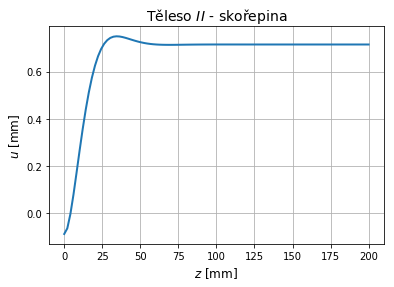

In [17]:
z_=np.linspace(0,2*R_,100)
uIIplot=[uII_(ii,R_,p_,E_,hII_,beta_,C1_,C2_) for ii in z_]
szplot=[6*Mz_(ii,B_,beta_,C1_,C2_)/hII_**2 for ii in z_]
stplot=[Nt_(ii,R_,p_,B_,beta_,C1_,C2_)/hII_- \
        6*Mt_(ii,mu_,B_,beta_,C1_,C2_)/hII_**2 for ii in z_]

fig,ax=plt.subplots()
plt.title('Těleso $II$ - skořepina').set_fontsize(14)
plt.ylabel(r'$u$ [mm]').set_fontsize(12)
plt.xlabel(r'$z$ [mm]').set_fontsize(12)
ax.plot(z_,uIIplot,lw=2)
ax.grid(True)
plt.show()

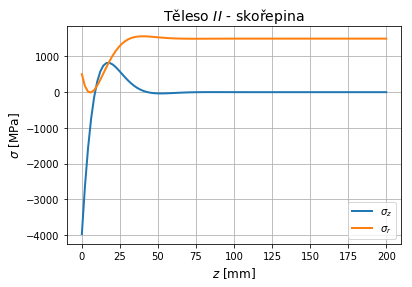

In [18]:
fig,ax=plt.subplots()
plt.title('Těleso $II$ - skořepina').set_fontsize(14)
plt.ylabel(r'$\sigma$ [MPa]').set_fontsize(12)
plt.xlabel(r'$z$ [mm]').set_fontsize(12)
ax.plot(z_,szplot,lw=2,label=r'$\sigma_z$')
ax.plot(z_,stplot,lw=2,label=r'$\sigma_r$')
ax.grid(True)
ax.legend(loc='best')
plt.show()